# Projet Final : Vendée Globe 2020-2021

## By Davide GARCIA CIVIERO - MS IA

L'objectif de ce projet est de manipuler les données issues de la Vendée Globe 2020-2021. <br>
Dans un premier temps, l'objectif sera de récupérer les informations sur le site en téléchargeant les différents classements des skippers, en prenant soin de nettoyer le dataset et de le stocker dans un DataFrame. <br>
Par la suite, je récupererai les données de chaque bateau et ferai le rapprochement avec le classement des skippers. <br>
En ce qui concerne l'analyse des données:
- Régression linéaire avec la VMG et le rang
- Affichage du parcours de deux participants
- Visualisation de la distance parcourue par chaque voilier
- Histogramme des types de foils
- Diagramme circulaire des matériaux utilisés pour la quille <br>
<br>
Pour avoir des fichiers semblables, j'ai pris la liberté d'exclure les fichiers à partir du 27 Janvier 2021 à 17h.

### Installation des librairies

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('max_columns', None)

### Récupération des informations du lien pour télécharger les fichiers Excel

Ici je récupère tous les noms des fichiers à télécharger.

In [3]:
url = "https://www.vendeeglobe.org/fr/classement"

r = requests.get(url)
soup = BeautifulSoup(r.content)

content_scrapping = soup.findAll('option')

a = list()
for element in content_scrapping:
    a.append(element['value'])
a = a[221:]

### Construction du dataset final par concatenation de tous les fichiers téléchargés

Cette fonction renomme les colonnes du dataset.

In [4]:
# Function renaming the dataset columns
def dataset_columns(df_):
    df = df_.drop([0], axis = 0)
    df = df.drop(['Unnamed: 0'], axis=1)
    df.columns = ['Rang', 'Nat. / Voile', 'Skipper / Bateau', 'Heure', 'Latitude', 'Longitude',
                'Cap_30min (°)', 'Vitesse_30min (kts)', 'VMG_30min (kts)', 'Distance_30min (nm)', 'Cap_class (°)',
                'Vitesse_class (kts)', 'VMG_class (kts)', 'Distance_class (nm)', 'Cap_24h (°)',
                'Vitesse_24h (kts)', 'VMG_24h (kts)', 'Distance_24h (nm)', 'DTF (nm)', 'DTL (nm)']
    
    return df

Dans ce morceau de code, je charge tous les fichiers Excel déjà téléchargés au préalable, et je les concatène pour constituer le premier dataset.

In [5]:
df = pd.DataFrame()
for file in a:
    temp_file = './files/' + file + '.xlsx'
    # Loading data file
    df_temp = pd.read_excel(temp_file, skiprows = 3)#.iloc[:34]
    # Cleaning the dataframe
    df_temp = dataset_columns(df_temp)
    # Concatenate the result
    df = pd.concat([df, df_temp], ignore_index=True)
df

,Rang,Nat. / Voile,Skipper / Bateau,Heure,Latitude,Longitude,Cap_30min (°),Vitesse_30min (kts),VMG_30min (kts),Distance_30min (nm),Cap_class (°),Vitesse_class (kts),VMG_class (kts),Distance_class (nm),Cap_24h (°),Vitesse_24h (kts),VMG_24h (kts),Distance_24h (nm),DTF (nm),DTL (nm)
0,1,\nFRA 79,Charlie Dalin\nAPIVIA,14:30 FR\n,46°14.07'N,03°41.61'W,39°,21.0 kts,16.0 kts,10.5 nm,37°,19.1 kts,17.4 kts,57.2 nm,61°,13.9 kts,13.9 kts,334.3 nm,80.5 nm,0.0 nm
1,2,\nFRA 18,Louis Burton\nBureau Vallée 2,14:31 FR\n1min,46°24.62'N,05°11.90'W,116°,17.8 kts,15.6 kts,9.2 nm,110°,17.7 kts,16.9 kts,53.3 nm,100°,17.2 kts,16.9 kts,412.1 nm,141.5 nm,60.9 nm
2,3,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,14:30 FR\n,44°31.46'N,05°20.55'W,130°,18.2 kts,3.4 kts,9.1 nm,113°,16.6 kts,10.3 kts,49.9 nm,84°,13.5 kts,12.9 kts,323.5 nm,190.0 nm,109.5 nm
3,4,\nFRA 59,Thomas Ruyant\nLinkedOut,14:30 FR\n,47°24.42'N,07°22.08'W,103°,17.6 kts,17.5 kts,8.8 nm,102°,17.6 kts,17.6 kts,52.9 nm,93°,18.1 kts,18.0 kts,433.4 nm,235.8 nm,155.3 nm
4,5,\nFRA 17,Yannick Bestaven\nMaître Coq IV,14:30 FR\n,47°43.38'N,07°58.81'W,98°,18.4 kts,18.3 kts,9.2 nm,98°,18.1 kts,18.1 kts,54.4 nm,91°,18.6 kts,18.6 kts,447.2 nm,264.3 nm,183.7 nm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17977,NaN,\nFRA 01,Jean Le Cam\nYes we Cam !,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17978,"Traitements et calculs : Géovoile, un service ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17980,VMG : Velocity Made Good = projection du vecte...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Affichage du dataset en ayant éliminé les colonnes possédant beaucoup de valeurs NaN (ce qui correspond aux abandons). J'ai fait ce choix pour faciliter le traitement et l'analyse des données, en me concentrant uniquement sur les participants ayant terminé la course.

In [6]:
df.reset_index(drop = True, inplace = True)
df = df.dropna(thresh=11)

### Dataset cleaning

Le dataset précédemment obtenu contient des valeurs de type 'string', avec les unités dans les cellules. <br>
Pour l'analyse des données, je vais d'abord nettoyer le dataset en ne gardant que des valeurs numériques dans les cellules où c'est possible (les unités sont gardées dans les noms de colonnes).

Je créé une fonction permettant de convertir les positions en décimal.

In [7]:
def dms2dec(position):
    deg = int(position[0])
    min = int(position[1])
    sec = int(position[2])
    
    if position[3] == 'N' or position[3] == 'E':
        card = 1
    elif position[3] == 'S' or position[3] == 'W':
        card = -1
        
    new_pos = (deg + min / 60 + sec / 3600) * card

    return new_pos

In [8]:
# Copy creation
df1 = df.copy()

# Dataset Cleaning

df1['Rang'] = df1['Rang'].apply(lambda x: x.split()[0])
df1['Nat. / Voile'] = df1['Nat. / Voile'].apply(lambda x: x[1:])
df1['Skipper / Bateau'] = df1['Skipper / Bateau'].apply(lambda x: x.replace('\n', ' '))
df1['Heure'] = df1['Heure'].apply(lambda x: x.replace('\n', ' '))

# Converting latitude and longitude
df1['Latitude'] = df1['Latitude'].apply(lambda x: x.replace('°', ';').replace('.', ';').replace("'", ';').split(';'))
df1['Longitude'] = df1['Longitude'].apply(lambda x: x.replace('°', ';').replace('.', ';').replace("'", ';').split(';'))

df1['Latitude'] = df1['Latitude'].apply(lambda x: dms2dec(x))
df1['Longitude'] = df1['Longitude'].apply(lambda x: dms2dec(x))

df1['Cap_30min (°)'] = df1['Cap_30min (°)'].apply(lambda x: x[0:3])
df1['Vitesse_30min (kts)'] = df1['Vitesse_30min (kts)'].apply(lambda x: float(x.split()[0]))
df1['VMG_30min (kts)'] = df1['VMG_30min (kts)'].apply(lambda x: float(x.split()[0]))
df1['Distance_30min (nm)'] = df1['Distance_30min (nm)'].apply(lambda x: float(x.split()[0]))
df1['Cap_class (°)'] = df1['Cap_class (°)'].apply(lambda x: x[0:3])
df1['Vitesse_class (kts)'] = df1['Vitesse_class (kts)'].apply(lambda x: float(x.split()[0]))
df1['VMG_class (kts)'] = df1['VMG_class (kts)'].apply(lambda x: float(x.split()[0]))
df1['Distance_class (nm)'] = df1['Distance_class (nm)'].apply(lambda x: float(x.split()[0]))
df1['Cap_24h (°)'] = df1['Cap_24h (°)'].apply(lambda x: x[0:3])
df1['Vitesse_24h (kts)'] = df1['Vitesse_24h (kts)'].apply(lambda x: float(x.split()[0]))
df1['VMG_24h (kts)'] = df1['VMG_24h (kts)'].apply(lambda x: float(x.split()[0]))
df1['Distance_24h (nm)'] = df1['Distance_24h (nm)'].apply(lambda x: float(x.split()[0]))

df1['DTF (nm)'] = df1['DTF (nm)'].apply(lambda x: float(x.split()[0]))
df1['DTL (nm)'] = df1['DTL (nm)'].apply(lambda x: float(x.split()[0]))
df1['Nom du skipper'] = df1['Skipper / Bateau'].apply(lambda x: x.split()[0]+' '+x.split()[1].upper())

Voici le dataset obtenu. J'ai créé une copie pour pouvoir garder un dataset 'de secours' et éviter de recharger toutes les données à chaque fois. Ici on a bien des valeurs numériques pour les données concernant les vitesses, les distances ou encore les latitudes et longitudes.

In [9]:
df1

,Rang,Nat. / Voile,Skipper / Bateau,Heure,Latitude,Longitude,Cap_30min (°),Vitesse_30min (kts),VMG_30min (kts),Distance_30min (nm),Cap_class (°),Vitesse_class (kts),VMG_class (kts),Distance_class (nm),Cap_24h (°),Vitesse_24h (kts),VMG_24h (kts),Distance_24h (nm),DTF (nm),DTL (nm),Nom du skipper
0,1,FRA 79,Charlie Dalin APIVIA,14:30 FR,46.235278,-3.700278,39°,21.0,16.0,10.5,37°,19.1,17.4,57.2,61°,13.9,13.9,334.3,80.5,0.0,Charlie DALIN
1,2,FRA 18,Louis Burton Bureau Vallée 2,14:31 FR 1min,46.417222,-5.208333,116,17.8,15.6,9.2,110,17.7,16.9,53.3,100,17.2,16.9,412.1,141.5,60.9,Louis BURTON
2,3,MON 10,Boris Herrmann Seaexplorer - Yacht Club De Monaco,14:30 FR,44.529444,-5.348611,130,18.2,3.4,9.1,113,16.6,10.3,49.9,84°,13.5,12.9,323.5,190.0,109.5,Boris HERRMANN
3,4,FRA 59,Thomas Ruyant LinkedOut,14:30 FR,47.411667,-7.368889,103,17.6,17.5,8.8,102,17.6,17.6,52.9,93°,18.1,18.0,433.4,235.8,155.3,Thomas RUYANT
4,5,FRA 17,Yannick Bestaven Maître Coq IV,14:30 FR,47.727222,-7.989167,98°,18.4,18.3,9.2,98°,18.1,18.1,54.4,91°,18.6,18.6,447.2,264.3,183.7,Yannick BESTAVEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17934,27,FRA 72,Alexia Barrier TSE - 4myplanet,15:30 FR,46.439722,-1.825556,236,10.9,10.8,0.2,357,0.0,0.0,2789.4,194,0.6,0.4,4.5,24295.4,1.6,Alexia BARRIER
17935,28,FRA 27,Isabelle Joschke MACSF,15:26 FR -4min,46.427222,-1.806111,238,13.8,13.5,0.2,358,0.0,0.0,2788.5,187,0.2,0.2,5.2,24295.5,1.6,Isabelle JOSCHKE
17936,29,FRA 4,Sébastien Simon ARKEA PAPREC,15:29 FR -1min,46.437500,-1.820278,235,13.4,13.4,0.7,357,0.0,0.0,2789.3,192,0.2,0.1,4.5,24295.5,1.6,Sébastien SIMON
17937,30,FRA 50,Miranda Merron Campagne de France,15:28 FR -2min,46.427500,-1.809444,237,11.4,11.3,0.4,358,0.0,0.0,2788.9,188,0.2,0.2,4.8,24295.6,1.7,Miranda MERRON


### Chargement des données des bateaux

Pour obtenir les données de chaque bateaux, j'utilise 'requests' et 'BeautifulSoup' pour faire du web scraping et recenser toutes les informations utiles des bateaux dans un seul dataframe.

In [10]:
# Retrieving the page data for boats
url_boat = "https://www.vendeeglobe.org/fr/glossaire"
r = requests.get(url_boat)
soup = BeautifulSoup(r.content, 'html.parser')

Plus précisément, je stock chaque information (longueur, largeur, tirant d'eau etc.) dans des listes. Puis je créé le dataframe à partir de ces listes.

In [11]:
info = soup.findAll('div', attrs={'class': 'boats-list__infos'})
name_boat = list()
name_skipper = list()

# Retrieving boat and skipper names
for boat in info:
    name_boat.append(boat.find('h3', attrs={'class': 'boats-list__boat-name'}).text)
    name_skipper.append(boat.find('span', attrs={'class': 'boats-list__skipper-name'}).text)

info1 = soup.findAll('ul', attrs={'class': 'boats-list__popup-specs-list'})

id_el = list()

for boat in info1:
    header = boat.findAll('li')
    header = [a.text for a in header]
    id_el.append([a.split(':') for a in header])

num_voile = list()
ancien_nom = list()
architecte = list()
chantier = list()
date_lancement = list()
longueur = list()
largeur = list()
tirant = list()
deplacement = list()
nbr_derive = list()
hauteur = list()
voile_quille = list()
surface_pres = list()
surface_portant = list()
fsd = 0
for el1 in id_el:  # Boucle sur chaque bateau
    if 'Anciens noms du bateau' not in el1[1][0].rstrip():
        ancien_nom.append('NaN')
    if 'Numéro de voile' not in el1[0][0].rstrip():
        num_voile.append('NaN')
    for el2 in el1:  # On boucle sur chaque information
        
        if el2[0].rstrip() == 'Numéro de voile':
            num_voile.append(el2[1])
        elif el2[0].rstrip() == 'Anciens noms du bateau':
            ancien_nom.append(el2[1])
        elif el2[0].rstrip() == 'Architecte':
            architecte.append(el2[1])
        elif el2[0].rstrip() == 'Chantier':
            chantier.append(el2[1])
        elif el2[0].rstrip() == 'Largeur':
            largeur.append(float(el2[1].replace('m','').replace(',','.')))
        elif el2[0].rstrip() == 'Longueur':
            longueur.append(float(el2[1].replace('m','').replace(',','.')))
        elif el2[0].rstrip() == 'Date de lancement':
            date_lancement.append(el2[1])
        elif el2[0].rstrip() == "Tirant d'eau":
            tirant.append(float(el2[1].replace('m','').replace(',','.')))
        elif el2[0].rstrip() == 'Déplacement (poids)':
            deplacement.append(float(el2[1].replace('tonnes','').replace('t','').replace('NC', 'NaN').replace('nc','NaN').replace(',','.')))
        elif el2[0].rstrip() == 'Hauteur mât':
            hauteur.append(float(el2[1].replace('m','').replace(',','.')))
        elif el2[0].rstrip() == 'Nombre de dérives':
            nbr_derive.append(el2[1])
        elif el2[0].rstrip() == 'Surface de voiles au près':
            surface_pres.append(int(el2[1].strip()[:3]))
        elif el2[0].rstrip() == 'Surface de voiles au portant':
            surface_portant.append(int(el2[1].strip()[:3]))
        elif el2[0].rstrip() == 'Voile quille':
            voile_quille.append(el2[1])
voile_quille.append('NaN')

### Création du dataframe avec les caractéristiques des bateaux

In [12]:
zipped = zip(name_boat, name_skipper, num_voile, ancien_nom, architecte, chantier, date_lancement, longueur, largeur, 
                  tirant, deplacement, nbr_derive, hauteur, voile_quille, surface_pres, surface_portant)
boat_cols = ('Nom du bateau', 'Nom du skipper', 'Numéro de voile', 'Annciens noms du bateau', 'Architecte', 'Chantier', 'Date de lancement',
            'Longueur (m)', 'Largeur (m)', "Tirant d'eau (m)", 'Déplacement (T)', 'Nombre de dérives', 'Hauteur du mât (m)',
            'Voile quille', 'Surface de voiles au près (m²)', 'Surface de voiles au portant (m²)')
df_boats = pd.DataFrame(list(zipped), columns=boat_cols)

#### Création d'une copie pour éviter de recharger la page

In [13]:
df_b = df_boats.copy()
df_b

,Nom du bateau,Nom du skipper,Numéro de voile,Annciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur (m),Largeur (m),Tirant d'eau (m),Déplacement (T),Nombre de dérives,Hauteur du mât (m),Voile quille,Surface de voiles au près (m²),Surface de voiles au portant (m²)
0,NEWREST - ART & FENÊTRES,Fabrice AMEDEO,FRA 56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,01 Août 2015,18.28,5.85,4.5,7.0,foils,29.0,monotype,320,570
1,PURE - Best Western®,Romain ATTANASIO,FRA 49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),08 Mars 2007,18.28,5.80,4.5,9.0,2,28.0,acier forgé,280,560
2,TSE - 4MYPLANET,Alexia BARRIER,FRA72,"Famille Mary-Etamine du Lys, Initiatives Coeu...",Marc Lombard,MAG France,01 Mars 1998,18.28,5.54,4.5,9.0,2,29.0,acier,260,580
3,Maître CoQ IV,Yannick BESTAVEN,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,12 Mars 2015,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310,550
4,CHARAL,Jérémie BEYOU,08,NaN,VPLP,CDK Technologies,18 Août 2018,18.28,5.85,4.5,8.0,foils,29.0,acier,320,600
5,LA MIE CÂLINE - ARTISANS ARTIPÔLE,Arnaud BOISSIÈRES,FRA 14,"Ecover3, Président, Gamesa, Kilcullen Voyager...",Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,03 Août 2007,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300,610
6,BUREAU VALLEE 2,Louis BURTON,18,Banque Populaire VIII,Verdier - VPLP,CDK Technologies,09 Juin 2015,18.28,5.80,4.5,7.6,foils,28.0,acier,300,600
7,ONE PLANET ONE OCEAN,Didac COSTA,ESP 33,Kingfisher - Educacion sin Fronteras - Forum ...,Owen Clarke Design,Martens Yachts,02 Février 2000,18.28,5.30,4.5,8.9,2,26.0,acier,240,470
8,GROUPE SÉTIN,Manuel COUSIN,FRA 71,"Paprec-Virbac2, Estrella Damm, We are Water, ...",Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),02 Février 2007,18.28,5.80,4.5,9.0,2 asymétriques,28.5,basculante sur vérin hydraulique,270,560
9,BANQUE POPULAIRE X,Clarisse CREMER,FRA30,Macif - SMA,Verdier - VPLP,CDK - Mer Agitée,01 Mars 2011,18.28,5.70,4.5,7.7,2,29.0,acier forgé,340,570


Ainsi, j'obtiens le dataframe avec les données pour chaque bateau. J'ai bien fait attention à convertir les valeurs en numérique lorsqu'il était possible et pertinent.

### Fusion des deux dataframes (rapprochement des données du voilier avec celles du classement)

Pour rapprocher les données des voiliers avec celles du classement, j'ai 'merge' les deux dataframes par rapport à la variable 'Nom du skipper' (que j'ai ajouté au tout premier dataframe du classement). J'obtiens ainsi un DataFrame 'total' qui contient toutes les informations que je vais utiliser pour mener l'analyse des données.

In [14]:
df_total = pd.merge(df1, df_b, how='outer', on='Nom du skipper', left_on=None, right_on=None,
                    left_index=False, right_index=False, sort=True, suffixes=('_x', '_y'),
                    copy=True, indicator=False, validate=None)
df_total = df_total.sort_values(by = 'Rang')
df_total.reset_index(drop=True, inplace=True)
df_total = df_total.dropna(thresh=20)

In [15]:
df_total

,Rang,Nat. / Voile,Skipper / Bateau,Heure,Latitude,Longitude,Cap_30min (°),Vitesse_30min (kts),VMG_30min (kts),Distance_30min (nm),Cap_class (°),Vitesse_class (kts),VMG_class (kts),Distance_class (nm),Cap_24h (°),Vitesse_24h (kts),VMG_24h (kts),Distance_24h (nm),DTF (nm),DTL (nm),Nom du skipper,Nom du bateau,Numéro de voile,Annciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur (m),Largeur (m),Tirant d'eau (m),Déplacement (T),Nombre de dérives,Hauteur du mât (m),Voile quille,Surface de voiles au près (m²),Surface de voiles au portant (m²)
0,1,FRA 79,Charlie Dalin APIVIA,08:30 FR,24.724167,-38.135833,5°,8.1,6.7,4.1,5°,12.5,10.5,50.1,357,15.0,12.8,360.2,2178.1,0.0,Charlie DALIN,APIVIA,FRA 79,NaN,Verdier,CDK technologies - MerConcept,05 Août 2019,18.28,5.85,4.5,8.0,foils,29.0,acier,350.0,560.0
1,1,FRA 17,Yannick Bestaven Maître Coq IV,11:30 FR,-56.927500,-82.991111,97°,14.9,14.8,7.5,100,18.4,18.3,55.3,86°,17.9,17.4,430.5,7535.5,0.0,Yannick BESTAVEN,Maître CoQ IV,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,12 Mars 2015,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0
2,1,FRA 17,Yannick Bestaven Maître Coq IV,08:30 FR,-56.755000,-84.650833,89°,19.4,19.4,9.7,97°,18.6,18.6,74.4,84°,18.3,17.6,439.6,7590.1,0.0,Yannick BESTAVEN,Maître CoQ IV,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,12 Mars 2015,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0
3,1,FRA 17,Yannick Bestaven Maître Coq IV,04:30 FR,-56.596944,-86.890556,99°,18.2,18.2,9.1,89°,16.6,16.4,116.3,84°,18.8,17.9,452.2,7664.4,0.0,Yannick BESTAVEN,Maître CoQ IV,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,12 Mars 2015,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0
4,1,FRA 17,Yannick Bestaven Maître Coq IV,21:30 FR,-56.587500,-90.400556,86°,18.3,17.9,9.1,87°,18.0,17.7,72.2,86°,19.7,18.7,473.9,7780.1,0.0,Yannick BESTAVEN,Maître CoQ IV,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,12 Mars 2015,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13779,9,ITA 34,Giancarlo Pedote Prysmian Group,17:30 FR,-38.936667,36.443889,87°,19.2,17.0,9.6,96°,19.6,18.7,58.8,85°,17.1,15.6,409.3,16801.4,547.4,Giancarlo PEDOTE,PRYSMIAN GROUP,ITA 34,Saint-Michel - Virbac,VPLP - Verdier,Multiplast,02 Avril 2015,18.28,5.80,4.5,8.0,foils,29.0,acier forgé,300.0,600.0
13780,9,FRA 09,Benjamin Dutreux OMIA - Water Family,17:30 FR,29.086667,-36.973333,9°,14.1,11.0,7.1,8°,14.2,11.1,42.5,7°,11.2,9.0,268.4,1945.1,594.1,Benjamin DUTREUX,OMIA - WATER FAMILY,FRA09,"Spirit of Yukoh, Neutrogena, Hugo Boss, Estre...",Bruce Farr Design,Offshore Challenge - Cowes,03 Juillet 2007,18.28,5.85,4.5,8.0,2,29.0,acier forgé,300.0,700.0
13781,9,FRA 09,Benjamin Dutreux OMIA - Water Family,21:30 FR,29.906944,-36.543889,31°,13.0,12.4,6.5,24°,13.5,12.4,53.9,12°,11.5,9.7,276.0,1895.8,599.6,Benjamin DUTREUX,OMIA - WATER FAMILY,FRA09,"Spirit of Yukoh, Neutrogena, Hugo Boss, Estre...",Bruce Farr Design,Offshore Challenge - Cowes,03 Juillet 2007,18.28,5.85,4.5,8.0,2,29.0,acier forgé,300.0,700.0
13782,9,FRA 09,Benjamin Dutreux OMIA - Water Family,07:00 FR -90min,27.022778,-36.921667,46°,9.6,9.6,4.8,31°,10.3,10.1,25.7,8°,12.3,11.1,294.7,2030.7,540.3,Benjamin DUTREUX,OMIA - WATER FAMILY,FRA09,"Spirit of Yukoh, Neutrogena, Hugo Boss, Estre...",Bruce Farr Design,Offshore Challenge - Cowes,03 Juillet 2007,18.28,5.85,4.5,8.0,2,29.0,acier forgé,300.0,700.0


### Corrélation et régression linéaire entre le rang et VMG

Dans un premier temps, je réalise une régression linéaire pour visualiser la corrélation entre le rang et la VMG depuis 24h. <br>
Pour cela, j'utilise la librairie Scikit-Learn avec le modèle de régression linéaire en affichant le graphe et le coefficient de détermination (le R-squared).

In [16]:
import sklearn.linear_model as lm
from sklearn.metrics import r2_score

Y = df_total['Rang'].to_numpy()
X = df_total['VMG_24h (kts)'].to_numpy()

skl_linmod = lm.LinearRegression(fit_intercept=True)
skl_linmod.fit(X.reshape(-1,1), Y.reshape(-1,1))

# Calcul coefficient de détermination (r_squared)
Y_pred = skl_linmod.intercept_ + skl_linmod.coef_[0] * X
coef_deter = r2_score(Y, Y_pred)

print("Coefficient de détermination:{}".format(coef_deter))

Coefficient de détermination:0.13003910731848545


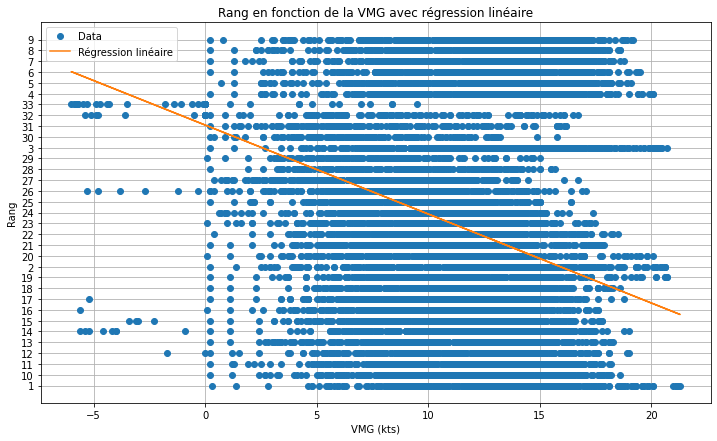

In [17]:
fig = plt.figure(figsize=(12, 7))

# Affichage des données 
plt.plot(X, Y, 'o', label="Data")

# Affichage de la droite de régression
plt.plot(X, Y_pred, label="Régression linéaire")
plt.legend(loc='upper left')

plt.xlabel('VMG (kts)')
plt.ylabel('Rang')
plt.title('Rang en fonction de la VMG avec régression linéaire')
plt.grid()
plt.show()

En choisissant la VMG depuis 24 heures, on obtient une corrélation négative entre le rang et la VMG. Ce résultat est cohérent car on peut s'attendre à ce que les skippers en haut du classement aient des vitesses plus élevées. <br>
Cependant, le coefficient de détermination de la régression linéaire est faible : 0.13 environ).

### Visualisation de la distance parcourue par voilier

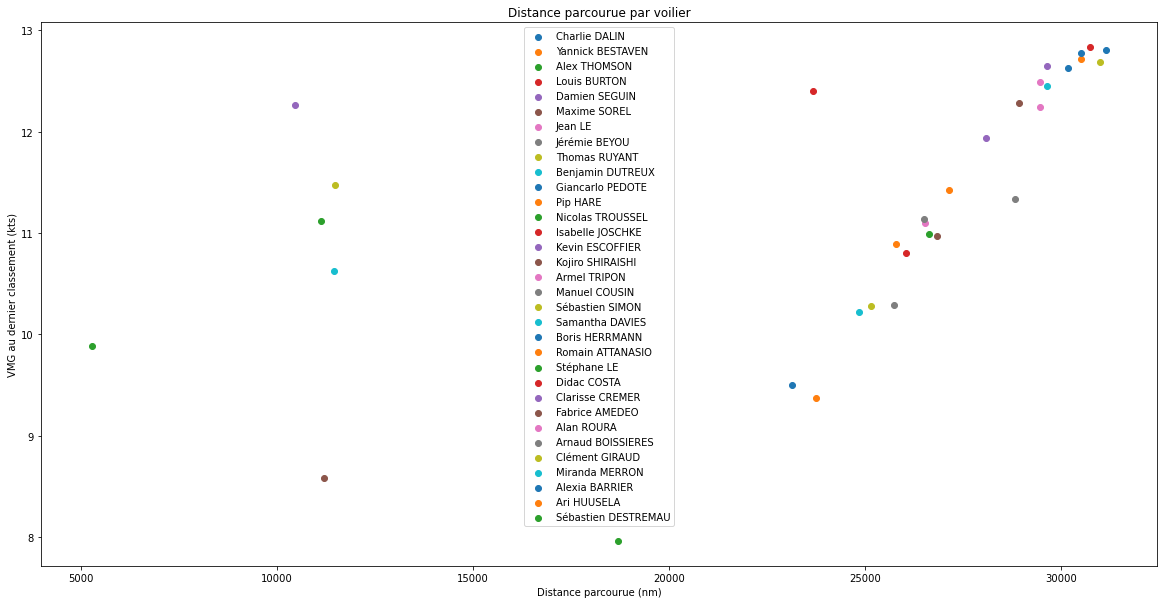

In [18]:
skipper = df_total['Nom du skipper'].unique()
dist = {}
for skip in skipper:
    if skip not in dist:
        dist[skip] = (df_total['Distance_class (nm)'].loc[df_total['Nom du skipper'] == skip].sum(),
                      df_total['VMG_class (kts)'].loc[df_total['Nom du skipper'] == skip].mean())

plt.figure(figsize=(20,10))

for key in dist:
    plt.scatter(dist[key][0], dist[key][1], label=key)
plt.xlabel('Distance parcourue (nm)')
plt.ylabel('VMG au dernier classement (kts)')
plt.title('Distance parcourue par voilier')
plt.legend(loc='best')
plt.show()

Dans ce graphe on remarque que, de manière générale, les skipper les plus rapides sont ceux qui ont parcouru le plus de distance.

###  Histogramme des bateaux possédant un foil ou non

### Visualisation de la route empruntée par un voilier

In [19]:
#from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode(connected=True)

In [20]:
import cartopy as cp
import cartopy.crs as crs
import cartopy.feature as cfeature

Nous allons afficher la route empruntée par les Skippers Giancarlo PEDOTE et Yannick BESTAVEN. Pour cela j'ai utilisé la librairie 'cartopy' et affiché la carte du monde. Le trajet n'est pas complet car je n'ai chargé qu'une partie des fichiers Excel car j'avais une connexion assez mauvaise et je ne pouvais charger les 700 fichiers.

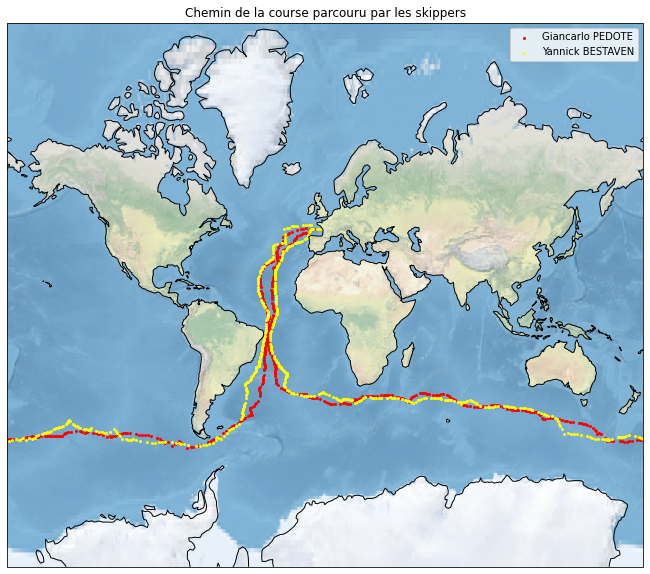

In [21]:
figure = plt.figure(figsize=(20,10))

ax = figure.add_subplot(1,1,1, projection = crs.Mercator())
ax.stock_img()
ax.add_feature(cfeature.COASTLINE)

# Route de Giancarlo PEDOTE
plt.scatter(
    x=df_total["Longitude"].loc[df_total['Nom du skipper'] == 'Giancarlo PEDOTE'],
    y=df_total["Latitude"].loc[df_total['Nom du skipper'] == 'Giancarlo PEDOTE'],
    color="red",
    s=4,
    alpha=1,
    transform=crs.PlateCarree(),
    label = 'Giancarlo PEDOTE'
)

# Route de Yannick BESTAVEN
plt.scatter(
    x=df_total["Longitude"].loc[df_total['Nom du skipper'] == 'Yannick BESTAVEN'],
    y=df_total["Latitude"].loc[df_total['Nom du skipper'] == 'Yannick BESTAVEN'],
    color="yellow",
    s=4,
    alpha=1,
    transform=crs.PlateCarree(),
    label = 'Yannick BESTAVEN'
)
plt.legend()
plt.title('Chemin de la course parcouru par les skippers')
plt.show()

Ici on voit clairement le chemin parcouru par les skippers. La course a débuté sur la côte Ouest française. Les participants ont ensuite parcouru tout l'Atlantique et longeant l'Espagne et l'Amérique du Sud vers le Brésil. <br>
Ils sont ensuite partis vers l'Est à côté de l'Afrique du Sud en traversant tout l'Océan Indien pour arriver au niveau de l'Australie. <br>
Ils sont passés par la pointe de l'Amérique du Sud, ils ont remonté tout l'Atlantique pour revenir au point de départ.


### Histogramme des différentes dérives des bateaux

Text(0.5, 1.0, 'Histogramme des bateaux possédant un foil ou autre dérive')

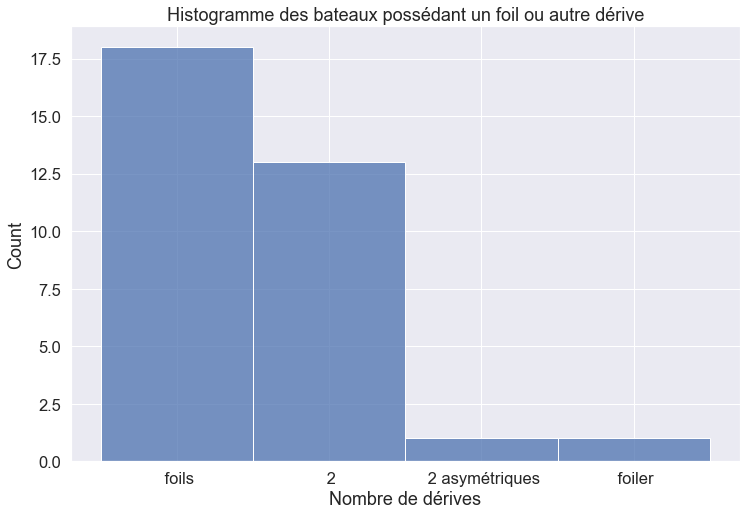

In [22]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.histplot(df_boats['Nombre de dérives'])
plt.title("Histogramme des bateaux possédant un foil ou autre dérive")

Cet histogramme montre l'occurrence des types de dérives utilisées par les skippers. On remarque aisément que la dérive la plus utilisée est le foiler. Ensuite, nous avons les bateaux avec 2 dérives et en minorité les bateaux avec 2 dérives asymétrique et avec foiler. <br>
Le fait que le foiler soit le plus utilisé peut laisser penser qu'il y a un certain avantage à l'utiliser.

### Diagramme circulaire

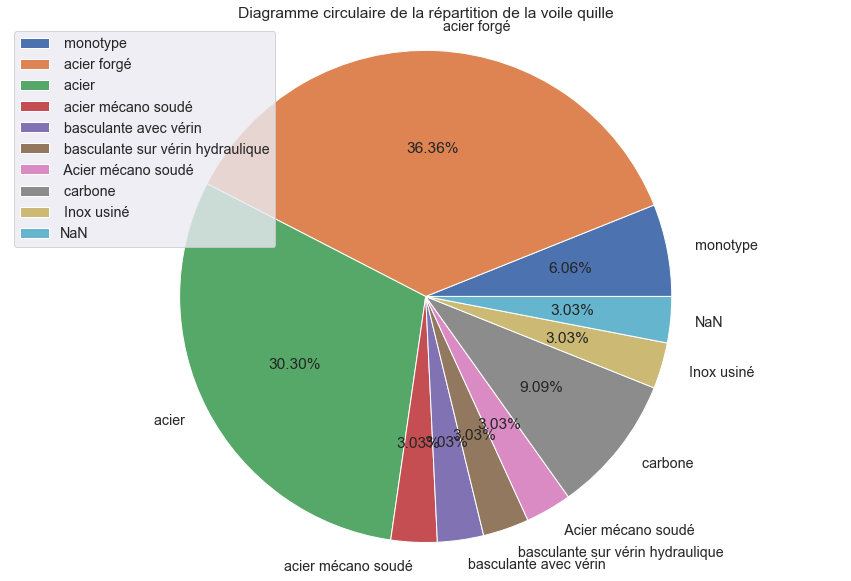

In [23]:
import collections

plt.figure(figsize=(15,10))
sns.set(font_scale=1.3)
occ = collections.Counter(df_boats['Voile quille'])
labels = list()
sizes = list()
for x, y in occ.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels, normalize=True, autopct = "%0.2f%%")

plt.axis('equal')
plt.title('Diagramme circulaire de la répartition de la voile quille')
plt.legend(loc='upper left')
plt.show()

Ce diagramme circulaire donne la répartition des matériaux de la voile quille. On voit que l'acier forgé est le matériau le plus utilisé par les bateaux, suivi par l'acier. <br>
Ensuite on a d'autres matériaux plus minoritaires comme le carbone ou l'inox usiné.

### Conclusion

Ce projet a permis de voir une application directe des outils utilisés en Data Science en suivant les étapes principales : <br>
- Le chargement des données
- La constitution du dataset
- Le nettoyage des données
- L'analyse et la visualisation des données
<br>
Il m'a également permis d'appliquer les connaissances acquises durant le cours comme : la manipulation des dataframes avec 'pandas', le web scraping avec 'requests' et 'bs4', l'analyse avec 'SKlearn et l'affichage de cartes avec 'cartopy' et la visualisation des données avec 'matplotlib' et 'seaborn'. <br>
<br>Les difficultés rencontrées durant ce projet ont été principalement dues :
- Au chargement des données (avec téléchargement des fichiers Excel en local)
- Au web scraping des données de chaque voilier
- A la fusion des deux datasets